In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [37]:
x1 = np.array([18 + 1 * np.random.randn() for i in range(1, 100)])
x2 = np.array([5 + 1 * np.random.randn() for i in range(1, 100)])
y1 = np.array([1 for i in range(1, 100)])
y2 = np.array([0 for i in range(1, 100)])
label = ["Dadang" for i in range(1, 100)]

df_1 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
})

df_1

,x1,x2,y1,y2,label
0,18.938327,4.337394,1,0,Dadang
1,17.387204,7.380445,1,0,Dadang
2,17.836293,4.754940,1,0,Dadang
3,17.967715,4.813244,1,0,Dadang
4,19.199495,4.182303,1,0,Dadang
...,...,...,...,...,...
94,17.724588,5.295115,1,0,Dadang
95,18.270054,4.486400,1,0,Dadang
96,20.064570,4.501849,1,0,Dadang
97,19.490627,3.651475,1,0,Dadang


In [38]:
x1 = np.array([10 + 1 * np.random.randn() for i in range(1, 100)])
x2 = np.array([9 + 1 * np.random.randn() for i in range(1, 100)])
y1 = np.array([0 for i in range(1, 100)])
y2 = np.array([1 for i in range(1, 100)])
label = ["Bambang" for i in range(1, 100)]

df_2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
})

df_2

,x1,x2,y1,y2,label
0,9.127976,8.913572,0,1,Bambang
1,10.220011,8.308889,0,1,Bambang
2,11.759866,9.124711,0,1,Bambang
3,10.949951,8.486084,0,1,Bambang
4,7.990053,9.806237,0,1,Bambang
...,...,...,...,...,...
94,10.913483,8.427174,0,1,Bambang
95,8.293419,8.972756,0,1,Bambang
96,10.176198,7.859730,0,1,Bambang
97,10.232054,8.735808,0,1,Bambang


In [40]:
df = pd.concat([df_1, df_2])
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df

,x1,x2,y1,y2,label
0,9.040924,9.035806,0,1,Bambang
1,18.896079,4.108563,1,0,Dadang
2,11.256770,7.796453,0,1,Bambang
3,16.587115,4.418741,1,0,Dadang
4,18.253588,4.711603,1,0,Dadang
...,...,...,...,...,...
193,18.437959,4.551433,1,0,Dadang
194,18.053822,6.535560,1,0,Dadang
195,8.892928,9.744285,0,1,Bambang
196,17.554960,4.109888,1,0,Dadang


In [41]:
w11 = np.random.uniform(-0.01, 0.01)
w12 = np.random.uniform(-0.01, 0.01)
w21 = np.random.uniform(-0.01, 0.01)
w22 = np.random.uniform(-0.01, 0.01)
W = np.array([[w11, w12], [w21, w22]])
W

array([[-6.79501913e-03,  6.54288160e-03],
       [-1.17033718e-03, -4.41395183e-05]])

In [45]:
learning_rate = 0.1
error_array = np.zeros((2,len(df)))
answer = []

for index, baris in df.iterrows():
    W_lama = W
    input = np.array([[baris.x1], [baris.x2]])
    output_pred = sigmoid(np.dot(W, input))
    output_actual = np.array([[baris.y1], [baris.y2]])

    error = (output_actual - output_pred) ** 2

    delta_W = np.dot(learning_rate * 2 * (output_actual - output_pred) * output_pred * (1 - output_pred), input.T)
    W_baru = W_lama + delta_W
    W = W_baru

    error_array[:,index] = error.T*error.T

    tebakan = np.argmax(output_pred)
    jawaban = np.argmax(output_actual)

    label = "Bambang" if tebakan == 1 else "Dadang"

    if tebakan == jawaban:
        answer.append(1)
    else:
        answer.append(0)

    print(f"Index: {index}, tebakan = {label}, jawaban = {baris.label}")

Index: 0, tebakan = Dadang, jawaban = Bambang
Index: 1, tebakan = Bambang, jawaban = Dadang
Index: 2, tebakan = Bambang, jawaban = Bambang
Index: 3, tebakan = Bambang, jawaban = Dadang
Index: 4, tebakan = Bambang, jawaban = Dadang
Index: 5, tebakan = Bambang, jawaban = Bambang
Index: 6, tebakan = Bambang, jawaban = Bambang
Index: 7, tebakan = Bambang, jawaban = Dadang
Index: 8, tebakan = Bambang, jawaban = Dadang
Index: 9, tebakan = Dadang, jawaban = Dadang
Index: 10, tebakan = Dadang, jawaban = Bambang
Index: 11, tebakan = Dadang, jawaban = Bambang
Index: 12, tebakan = Bambang, jawaban = Bambang
Index: 13, tebakan = Dadang, jawaban = Dadang
Index: 14, tebakan = Dadang, jawaban = Dadang
Index: 15, tebakan = Dadang, jawaban = Dadang
Index: 16, tebakan = Dadang, jawaban = Bambang
Index: 17, tebakan = Bambang, jawaban = Bambang
Index: 18, tebakan = Bambang, jawaban = Bambang
Index: 19, tebakan = Bambang, jawaban = Bambang
Index: 20, tebakan = Bambang, jawaban = Dadang
Index: 21, tebakan =

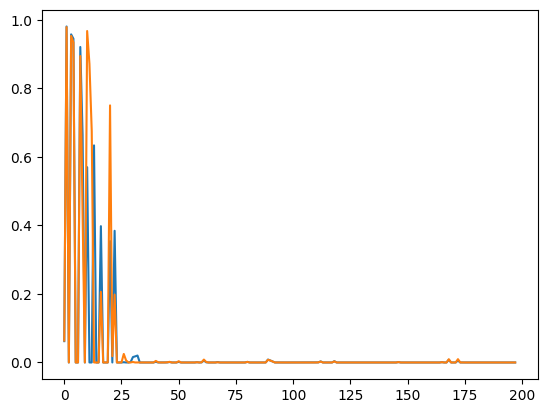

In [46]:
plt.plot(error_array.T)

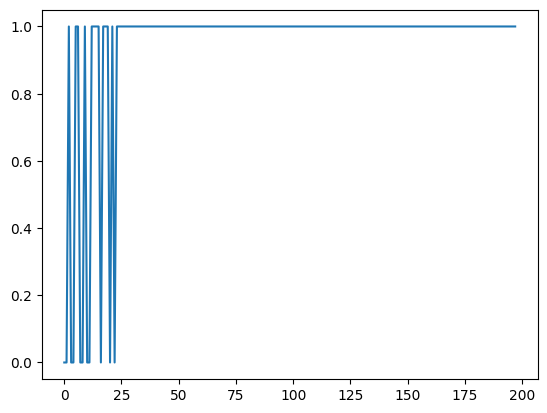

In [47]:
plt.plot(answer)

In [49]:
tinggi_badan = 10
berat_badan = 9
input = np.array([[tinggi_badan], [berat_badan]])
output_pred = sigmoid(np.dot(W, input))
pred = np.argmax(output_pred)

label = "Bambang" if pred == 1 else "Dadang"
print(f"Tinggi: {tinggi_badan * 10}, Berat: {berat_badan * 10} adalah {label}")

Tinggi: 100, Berat: 90 adalah Bambang
